In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

### Logistic Regression Basics


Logistic regression is a classification method built on the same concept as linear regression. With linear regression, we take linear combination of explanatory variables plus an intercept term to arrive at a prediction.

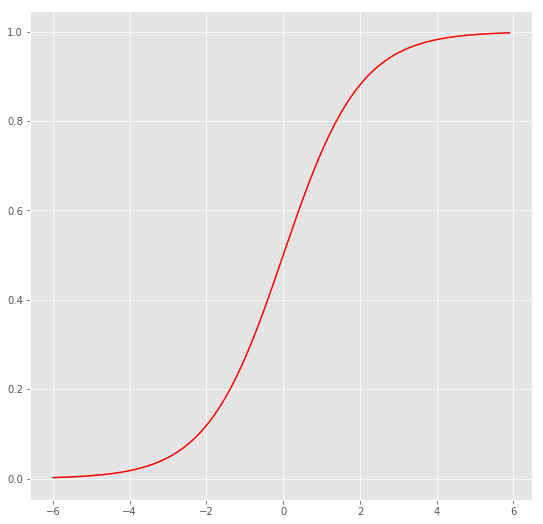

In [3]:
plt.figure(figsize=(9,9))

def sigmoid(t):                          # Define the sigmoid function
    return (1/(1 + np.e**(-t)))    

plot_range = np.arange(-6, 6, 0.1)       

y_values = sigmoid(plot_range)

# Plot curve
plt.plot(plot_range,   # X-axis range
         y_values,          # Predicted values
         color="red")

### Titanic Dataset

In [6]:
titanic_train = pd.read_csv("titanic_train.csv")    # Read the data

char_cabin = titanic_train["Cabin"].astype(str)     # Convert cabin to str

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # Take first letter

titanic_train["Cabin"] = pd.Categorical(new_Cabin)  # Save the new cabin var

# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 

In [7]:
from sklearn import linear_model
from sklearn import preprocessing

In [8]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = pd.DataFrame(encoded_sex), 
              y = titanic_train["Survived"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[ 1.00027876]
[[-2.43010712]]


In [9]:
# Make predictions
preds = log_model.predict_proba(X= pd.DataFrame(encoded_sex))
preds = pd.DataFrame(preds)
preds.columns = ["Death_prob", "Survival_prob"]

# Generate table of predictions vs Sex
pd.crosstab(titanic_train["Sex"], preds.ix[:, "Survival_prob"])

Survival_prob,0.193125428972,0.731113382332
Sex,,
female,0,314
male,577,0


*Note: Use model.predict_proba() to get the predicted class probabilities. Use model.predict() to get the predicted classes.


The table shows that the model predicted a survival chance of roughly 19% for males and 73% for females.

In [10]:
# Convert more variables to numeric
encoded_class = label_encoder.fit_transform(titanic_train["Pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_train["Cabin"])

train_features = pd.DataFrame([encoded_class,
                              encoded_cabin,
                              encoded_sex,
                              titanic_train["Age"]]).T

# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = train_features ,
              y = titanic_train["Survived"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[ 3.32716302]
[[-0.90790164 -0.06426483 -2.43179802 -0.0265924 ]]


In [11]:
# Make predictions
preds = log_model.predict(X= train_features)

# Generate table of predictions vs actual
pd.crosstab(preds,titanic_train["Survived"])

Survived,0,1
row_0,,
0,463,98
1,86,244


In [12]:
log_model.score(X = train_features ,
                y = titanic_train["Survived"])

0.79349046015712688

In [13]:
from sklearn import metrics

In [14]:
# View confusion matrix
metrics.confusion_matrix(y_true=titanic_train["Survived"],  # True labels
                         y_pred=preds) # Predicted labels

array([[463,  86],
       [ 98, 244]])

In [15]:
# View summary of common classification metrics
print(metrics.classification_report(y_true=titanic_train["Survived"],
                              y_pred=preds) )

             precision    recall  f1-score   support

          0       0.83      0.84      0.83       549
          1       0.74      0.71      0.73       342

avg / total       0.79      0.79      0.79       891

